# 우리 기업의 매출이 왜 감소할까?

## 상황 인식과 문제 정의

### 1) 상황 인식
---
판매 상태 분석에서 3월 매출이 2월에 비해 무려 21.3% 가량 감소한 것을 확인. 그럼에도 유의미한 원인을 도출할 수 없었다. <br>
매출이 떨어지고 있는 원인을 분석하고 대응 전략을 수립해보도록 하자.

### 2) 문제 정의
---
> 핵심 문제: 우리 기업의 매출은 왜 감소하고 있는가?

게임 시장 환경이나 게임 상태를 고려할 때 아직 충분히 성장할 수 있음에도 매출이 감소했다는 것은 뭔가 이상하다. <br>
이를 해결하기 위해 먼저 일반적으로 매출액이 감소하는 원인을 생각해보자. <br>
매출액은 (판매하고 있는 제품/서비스의 가격) * (판매 수량)으로 정의된다. <br>
<br>
분석 목적을 다음과 같이 설정하도록 하자. <br>
- 우리의 게임의 판매량은 구체적으로 어디에서 감소하고 있는가?
- 그리고 이를 극복하기 위한 대응전략은 무엇인가?

## 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
# sales_data 변수를 만들고 각 데이터 값을 할당
sales_data = pd.read_csv('./data/sales_6.csv')

# 변수 sales_data의 head 값 확인하기
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


총 6개의 columns: <br>
- `install`: 고객들이 게임을 설치한 일자
- `Time_stamp`: 최종 로그 기록
- `Game_Name`: 게임명
- `Status`: 상태
- `Payment`: 결제금액
- `Customer_ID`: 유저 아이디

우선 월별 게임 설치 / 플레이 횟수를 먼저 살펴보자

In [3]:
sales_data['date'] = sales_data['Time_stamp'].str[:7]
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


항목별 데이터가 얼마나 있는지 보여주는 countplot을 그려보자

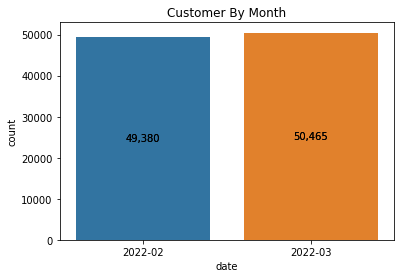

In [4]:
# 월별 고객 수 현황 시각화하기
ax = sns.countplot(data=sales_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Month')

plt.show()

매출은 줄었는데 고객이 늘었다니 이상하다.

### 각 게임별 고객 숫자를 한 번 살펴보자.

In [5]:
# 월별 각 게임 고객 수 분류하기
grouped = sales_data['Status'].groupby([sales_data['date'], sales_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Status, dtype: int64

막대그래프를 그려 월별 각 게임 고객의 수를 시각화해보자.

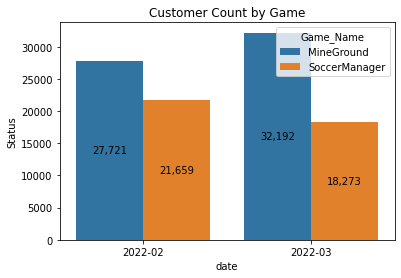

In [6]:
# 월별 각 게임 고객 수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Status', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Count by Game')
plt.show()

Mine Ground 고객은 증가했고, Soccer Manager 고객은 감소했다. <br>
Soccer Manager 고객 수만 감소한 원인이 있을까? <br>
<br>
우선은 전체 기업 입장의 분석에 집중해보자.

이번에는 게임을 플레이한 고객과 인스톨한 고객으로 구분해보자.

In [7]:
# sales_data의 Status 열에 포함된 값들의 개수 세어보기
sales_data['Status'].value_counts()

play       84821
install    15024
Name: Status, dtype: int64

countplot으로 시각화해보자

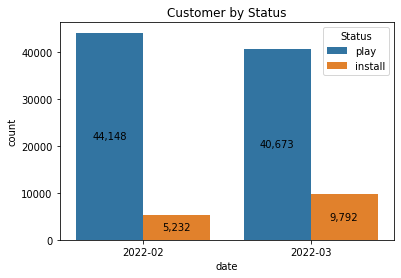

In [8]:
ax = sns.countplot(data=sales_data, x='date', hue='Status')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer by Status')
plt.show()

인스톨한 고객은 증가했지만, 플레이한 고객은 감소했다.

### 이번에는 월별 결제 건수를 살펴보자

In [9]:
temp_data = sales_data[sales_data['Payment'] !=0]
temp_data['date'].value_counts()

2022-02    8542
2022-03    6898
Name: date, dtype: int64

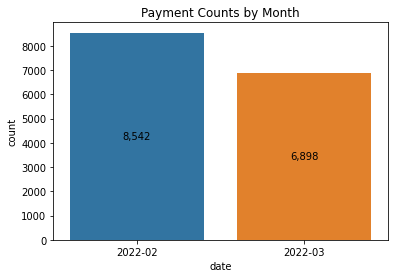

In [10]:
# 월별 결제 횟수 시각화하기
ax = sns.countplot(data=temp_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Counts by Month')
plt.show()

결제 건수가 많이 줄었다. <br>
Soccer Manager 고객 수가 줄었던 것을 감안하면 Soccer Manager의 결제 건수만 줄었을 것이다.

확인을 위해 우선 각 게임별 결제 건수를 확인하고 막대 그래프를 이용해 시각화해보자.

In [11]:
# 각 게임별 결제 건수 확인하기
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       4318
         SoccerManager    4224
2022-03  MineGround       3762
         SoccerManager    3136
Name: Payment, dtype: int64

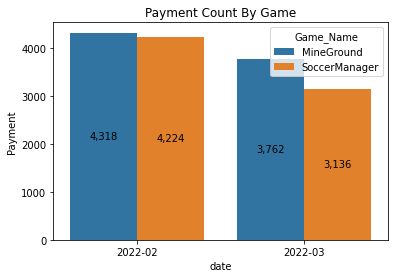

In [12]:
# 각 게임별 결제 건수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

In [13]:
# 각 게임별 결제 금액 확인하기
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).sum()
grouped

date     Game_Name    
2022-02  MineGround       42114200
         SoccerManager    38727600
2022-03  MineGround       38722800
         SoccerManager    29638400
Name: Payment, dtype: int64

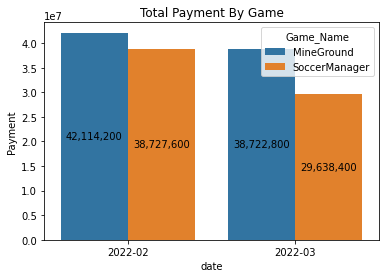

In [14]:
# 각 게임별 결제 금액 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Total Payment By Game')
plt.show()

Mine Ground와 Soccer Manager 모두 결제 건수와 결제 금액이 줄었다. <br>
즉, 매출액이 줄어든 것에 대한 원인은 Soccer Manager의 고객 숫자가 줄얻느 것보다 두 게임에서의 결제 인원이 줄어든 것이 더 큰 원인이라고 볼 수 있다.

### 이제 본격적으로 매출액에 영향을 주는 고객들을 정의하고 살펴보자

In [15]:
# player_data변수를 만들고 sales_data에서 Status가 play인 고객들만 골라내 할당하기
player_data = sales_data[sales_data['Status'] == 'play']
player_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03


게임을 설치하고 한 번이라도 플레이한 고객들은 총 84821명인 것을 알 수 있다. <br>
전체 고객 숫자가 99845명이니까 플레이 비율은 약 84.9% 수준이다.

### 이번에는 신규 고객과 기존 고객을 구분해보자

In [16]:
# plater_data에 install_date열을 만들고, install열 값의 7번째 값까지 입력
player_data['install_date'] = player_data['install'].copy().str[:7]
player_data['play_date'] = player_data['Time_stamp'].copy().str[:7]

C:\Users\Soyeong\AppData\Local\Temp\ipykernel_3488\4267768722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['install_date'] = player_data['install'].copy().str[:7]
C:\Users\Soyeong\AppData\Local\Temp\ipykernel_3488\4267768722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['play_date'] = player_data['Time_stamp'].copy().str[:7]


플레이한 고객들이 인스톨한 날과 비교해서 <br>
인스톨한 시기가 플레이한 시기가 같으면 신규 고객으로, 아니면 기존 고객으로 정의

In [17]:
# plater_data에 type열을 만들고, install_date와 play_date열의 값이 같으면 New Player을 입력, 값이 다르면 Existing을 입력
player_data['type'] = np.where(player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')

C:\Users\Soyeong\AppData\Local\Temp\ipykernel_3488\3421111074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['type'] = np.where(player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')


In [18]:
# 월별 신규 고객과 기존 고객 현황 세어보기
grouped = player_data['Status'].groupby([player_data['play_date'], player_data['type']]).count()
grouped

play_date  type      
2022-02    Existing      28668
           New Player    15480
2022-03    Existing      28207
           New Player    12466
Name: Status, dtype: int64

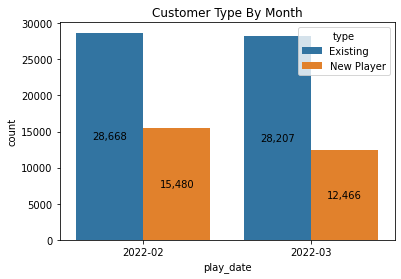

In [19]:
# 월별 신규 고객과 기존 고객 현황 시각화하기
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()

기존 플레이 고객은 461명, 신규 플레이 고객은 3014명이 감소했다. <br>
플레이 인원이 줄고 있다는 것은 큰 문제이다...!

### 이번에는 주 관심사인 결제금액을 살펴보자

In [20]:
# 월별 신규 고객과 기존 고객의 결제 현황 살펴보기
grouped = player_data["Payment"].groupby([player_data["play_date"], player_data["type"]]).sum()
grouped

play_date  type      
2022-02    Existing      50140500
           New Player    30701300
2022-03    Existing      50140500
           New Player    18220700
Name: Payment, dtype: int64

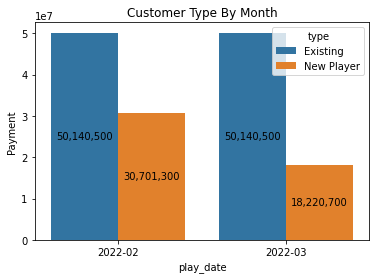

In [21]:
# 각 게임별 결제 금액 월별 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='play_date', y='Payment', hue='type')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()

이번에는 누적막대그래프를 사용해서 월별 신규 고객과 기존 고객의 결제 현황을 시각화해보자

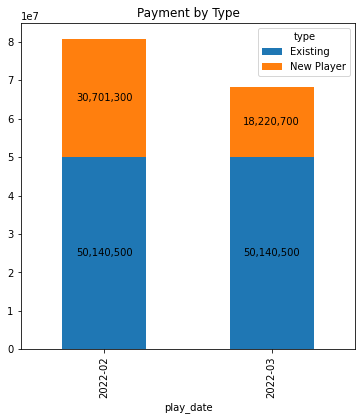

In [22]:
#월별 신규 고객과 기존 고객의 결제 현황 시각화하기(누적막대 보기)
ax = grouped.unstack().plot(kind='bar', stacked=True, grid=False, figsize=[6,6])

containers = ax.containers[-1]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-2]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('Payment by Type')
plt.show()

기존 고객이 결제한 금액은 동일한데 신규 고객이 결제한 금액은 40% 정도 감소했다. <br>
같은 기간에 신규 고객이 19% 가량 줄어든 것을 감안해도 결제 금액이 많이 줄었다. <br>
대책 마련이 시급하다.

### 신규 고객들이 결제한 금액을 보고 대응 전략을 마련해보도록 하자

In [23]:
# play_date의 인덱스를 type으로 지정하기
payment_data = player_data.set_index('type', drop=True)
payment_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date
type,,,,,,,,,
Existing,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02
Existing,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02
Existing,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02
Existing,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02
Existing,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02
...,...,...,...,...,...,...,...,...,...
New Player,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03
New Player,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03
New Player,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03


In [24]:
# 인덱스에서 Existing을 삭제하고 신규 고객들만 남기기
payment_data.drop('Existing', inplace=True)

In [25]:
# payment_data의 인덱스를 Payment로 지정하기
payment_data = payment_data.set_index('Payment')

# Payment_data의 인덱스에서 0을 삭제하고 결제 이력이 있는 고객만 남기기
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()

In [26]:
# 고객의 결제이력을 월별로 구분하기
payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

# 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)

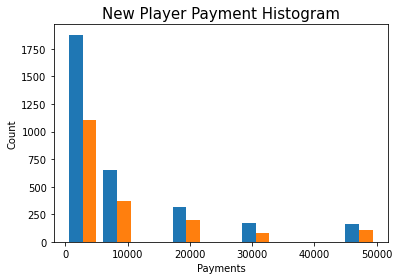

In [27]:
# 신규 고객들의 결제이력을 히스토그램으로 그리기
bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()

신규 고객들의 경우 모든 금액대에서 결제건수가 줄었다.

### 기존 고객들의 결제 건수를 확인해보자

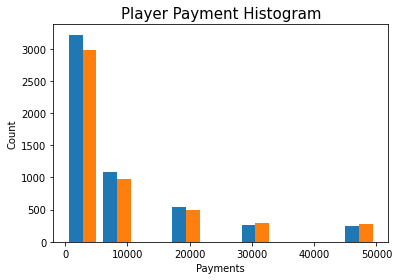

In [28]:
# play_date의 인덱스를 type으로 지정하기
payment_data = player_data.set_index('type', drop=True)

# 인덱스에서 New_player을 삭제하고 기존 고객들만 남기기
payment_data = payment_data.drop('New Player')

# payment_data의 인덱스를 Payment로 지정하기
payment_data = payment_data.set_index("Payment")

# Payment_data의 인덱스에서 0을 삭제하고 결제 이력이 있는 고객만 남기기
payment_data = payment_data.drop(0)
payment_data = payment_data.reset_index()

# 고객의 결제이력을 월별로 구분하기
payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

# 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)

# 기존 고객들의 결제이력을 히스토그램으로 그리기
bins = np.linspace(0, 50000, 10)
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("Player Payment Histogram", fontsize=15)
plt.show()

기존 고객의 경우 소액결제금액은 줄었지만 30000원 이상 구간부터는 오히려 결제건수가 늘었다. <br>
각 고객들별로 다른 대응 전략이 필요할 것 같다.

### 전략 수립 및 실행
지금까지 분석 결과를 통해 다음과 같은 사실을 확인할 수 있었다.

- 고객수는 증가했지만 총 매출액은 감소하고 있다.
- 그러나 게임을 새로 인스톨한 고객이 증가했을 뿐, 매출에 도움이 되는 플레이 고객은 줄어들었다.
- 특히 각 게임 모두 결제 건수와 결제 금액이 줄어들었다.
- 반면 기존 고객들의 결제 현황은 변화가 없었으나, 신규 고객들의 결제 금액은 현저히 줄어들었다.

이상의 사실을 근거로 판단해볼 때, 신규 고객의 결제가 줄어 우리 기업의 매출액이 줄어들었다는 것을 확인할 수 있다. <br>
이제 이 결과를 바탕으로 매출액을 다시 끌어올리기 위한 전략을 수립해보자. <br>
<br>

우선 타겟은 신규 고객과 기존 고객으로 나누어진다. <br>
<br>
신규 고객의 경우 줄어들고 있는 플레이 고객의 수를 확보하는 것이 중요하다.<br>
또 월별 소액결제 차이가 상대적으로 심하게 발생하고 있다.<br>
따라서 소액결제를 통해 얻을 수 있는 혜택을 늘리는 한편, 신규 고객을 끌어모으기 위한 컨셉의 광고를 수행할 필요가 있을 것 같다.<br>
유명 연예인이 등장하는 광고 전략이 좋을 것 같다.<br>
<br>
반면 기존 고객의 경우 소액결제가 줄어든 측면도 있지만 고액 결제 부분이 더 눈에 띈다. 오히려 증가했기 때문이다. <br>
기존 고객들에게는 게임에 대한 관심을 환기하고 과금 규모를 조금 더 늘릴 수 있는 게임 내 이벤트를 수행하는게 좋을 것 같다.